In [1]:
using FFTW
using Plots


1. Zamień sygnał na sumę sygnałów np

x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400) 
Zaobserwuj wynik transformaty i wyjaśnij go.

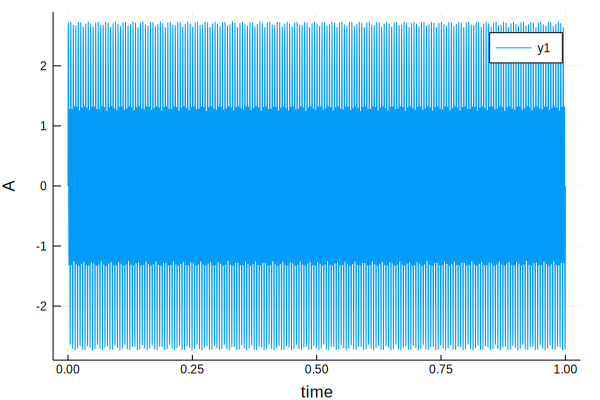

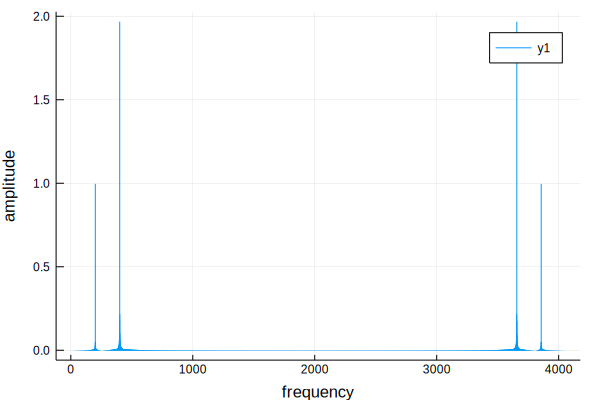

In [2]:
# ex 1

FS=4056 #sampling frequency must be big enough to print sticks 
t =0:1/(FS-1):1
N=length(t)
x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400) 
display(plot(t,x,xlabel="time",ylabel="A"))

y = abs.(fft(x))
sticks(2/N*abs.(y))
xlabel!("frequency")
ylabel!("amplitude")





2.  Usuwanie szumów:

    1. Wypełniamy tablicę wartościami funkcji cosinus ("sygnału") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().
    2. Prosze narysować wykres zaszumionej funkcji.
    3. Narysować wykres transformaty Fouriera (widmo)  tego sygnału (jak poprzednio).
    4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
    5.Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla <b> częsci  rzeczywistej</b>. Porównać z wejściowym wykresem sygnału.


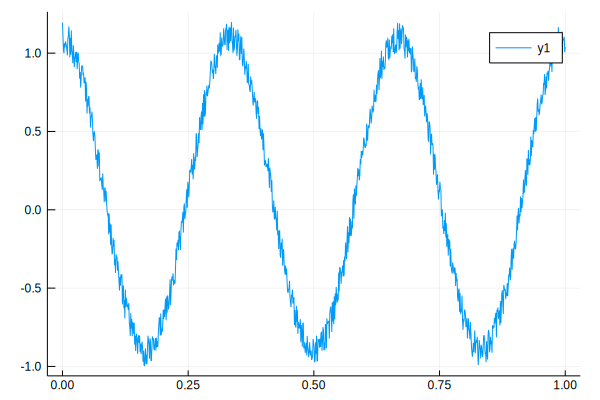

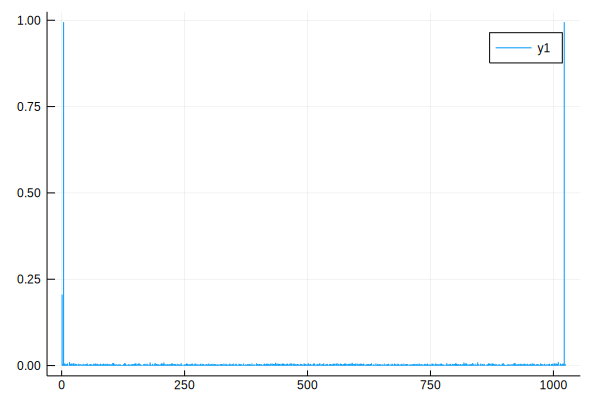

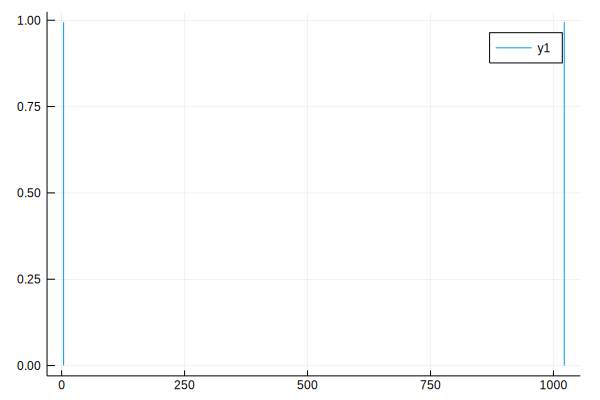

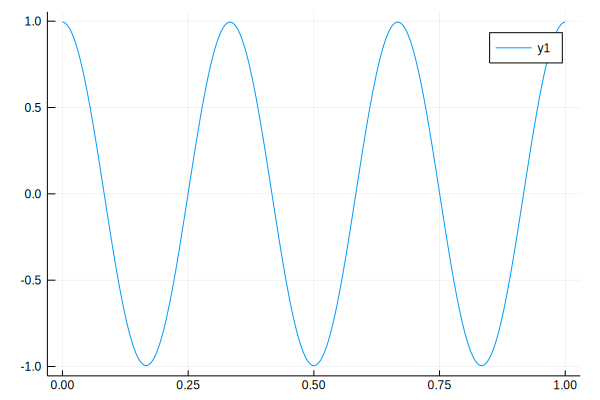

In [3]:
#ex 2
FS=1024


t =0:1/(FS-1):1
N=length(t)
x = cos.(2*pi*t*3)
x = map(v->v+rand()*0.2,x)
display(plot(t,x))

sticks(2/N*abs.(y))

y =fft(x)
_y =2/N*abs.(y)
display(sticks(_y))
xlabel!("frequency")
ylabel!("A")

for i in 1:N
    if _y[i] <0.25 y[i] =0 end
end

display(sticks(2/N*abs.(y)))


x = ifft(y)
x = map(v->real(v),x)
plot(t,x)


        

3. Proszę nagrać własny glos i zastosować na nim trasformatę Fouriera, narysować wykres widma. Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt.
Przydatne materiały:
     1. <a href="http://samcarcagno.altervista.org/blog/basic-sound-processing-julia/"> Basic sound processing</a>
     2. <a href="https://github.com/dancasimiro/WAV.jl"> Pakiet Wav </a>

In [4]:
using WAV


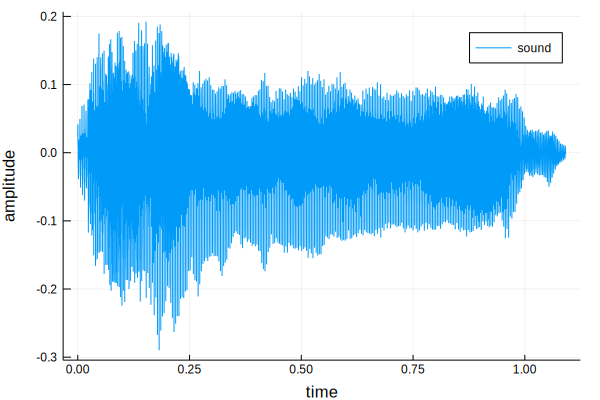

In [15]:
x, fs =wavread("sound.wav") #FS number of samples per second
x = x[:,1] #There are two speakers so there are 2 channels. It makes no difference which channel we choose. So lets take the first channel. 

N = length(x)
t =(0:(N-1))/fs

wavplay(x,fs)

display(plot(t,x,xlabel="time",ylabel="amplitude",label="sound"))

X = (fft(x))

y = 2/N*abs.(X)
println(" ")


In [ ]:
#display sticks
display(sticks(y))
xlabel!("frequency")
ylabel!("amplitude")

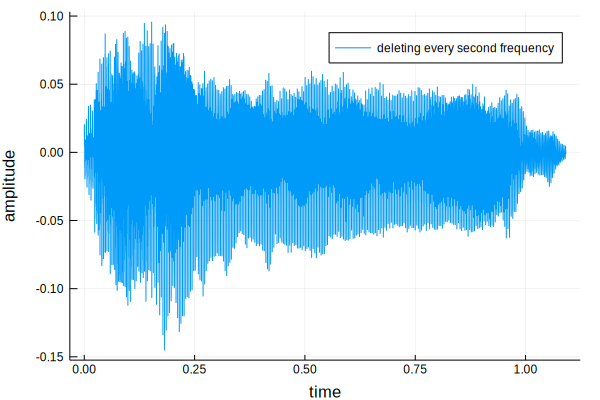

In [16]:
X1=copy(X)
i =1 
while(i<floor(length(X1)/2))
    # deleting every second frequency
    if i%2==1
        X1[i] = 0
        X1[length(X)-i+1] =X1[i]
    end

    i+=1
end

x = ifft(X1)
x = map(v->real(v),x)
display(plot(t,x,xlabel="time",ylabel="amplitude",label="deleting every second frequency"))
wavplay(x,fs)



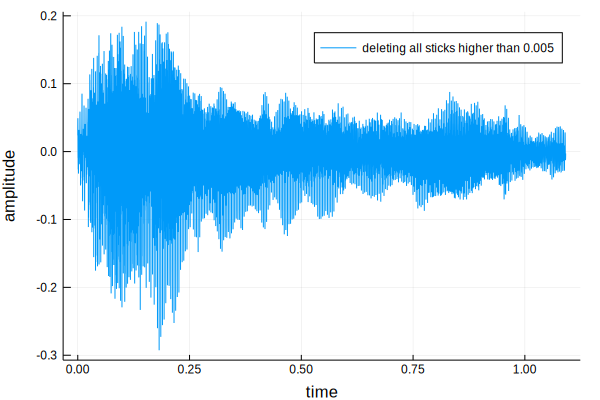

In [17]:
X1=copy(X)
i =1 
while(i<floor(length(X1)/2))

    if y[i] >0.005 #conditition which will sticks will be delated
        X1[i] = 0
        X1[length(X)-i+1] =X1[i]
    end
    i+=1
end

x = ifft(X1)
x = map(v->real(v),x)
display(plot(t,x,xlabel="time",ylabel="amplitude",label="deleting all sticks higher than 0.005"))
wavplay(x,fs)


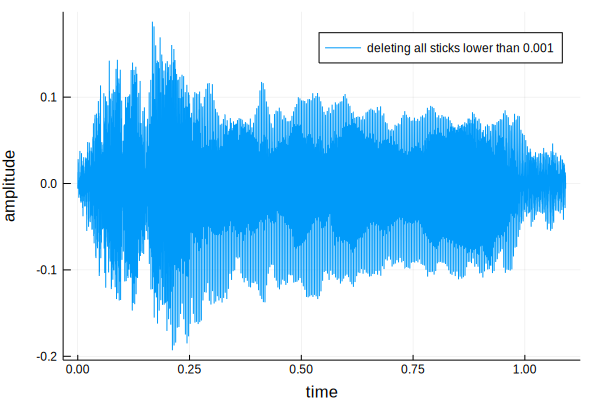

In [18]:
X1 =copy(X)
i =1 
while(i<floor(length(X)/2))

    if y[i] <0.001 #conditition which will sticks will be delated
        X1[i] = 0
        X1[length(X)-i+1] =X1[i]
    end
    i+=1
end

x = ifft(X1)
x = map(v->real(v),x)
display(plot(t,x,xlabel="time",ylabel="amplitude",label="deleting all sticks lower than 0.001"))
wavplay(x,fs)